# Semianr 6 - Applied Quantitative Logistics

## Implementing Genetic Algorithm for *Continuous Problems*

## Continuous GA

**Problem:** Sphere
$$
\min{z} = f_{sph}(x) = \begin{equation*}
 \sum_{i=1}^n {x_i}^2 \end{equation*}
$$

$$
x_{min} \le x_i \le x_{max}
$$

Optimal Solutions:

$$
\forall i \;
\left\{
    \begin{array}\\
        x_i^* = 0 \\
        z^* = 0 \\
    \end{array}
\right.
$$

In [2]:
import numpy as np
import pandas as pd
import random
import math
import matplotlib.pyplot as plt

### Cost Function

In [3]:
def sphere(x):
    
    global NFE
    
    if pd.isna(NFE):
        NFE = 0
    
    NFE += 1
    
    z = [item**2 for item in x]
    
    return sum(z)

In [4]:
def pop_sort(p, c):
    
    li = [[c[i], i] for i in range(len(c))]
    li.sort()
    
    sorted_index = [x[1] for x in li]
    
    sorted_pop = [p[i] for i in sorted_index]
    sorted_cost = [c[i] for i in sorted_index]

    return sorted_pop, sorted_cost

### CrossOver

In [5]:
def CrossOver(x1, x2, gamma, varMin, varMax):
    
    alpha = list(np.random.uniform(-gamma, 1+gamma, size=len(x1)))
    
    y1 = list(np.multiply(alpha, x1) + (1 - np.array(alpha))*np.array(x2))
    y2 = list(np.multiply(alpha, x2) + (1 - np.array(alpha))*np.array(x1))
    
    y1 = [max(i, varMin) for i in y1]
    y1 = [min(i, varMax) for i in y1]
    
    y2 = [max(i, varMin) for i in y2]
    y2 = [min(i, varMax) for i in y2]
    
    return y1, y2

### Mutation

In [6]:
def mutation(x, varMin, varMax):
    index = int(np.random.randint(0, len(x), size=1))
    
    sigma = 0.1 * (varMax-varMin)
    
    y = x.copy()
    
    y[index] = x[index] + sigma*np.random.randn()
    
    y = [max(i, varMin) for i in y]
    y = [min(i, varMax) for i in y]    
    return y

## How to more improve the Genetic Algorithm 

Parent selection can be an option.

### Roulette Wheel Selection

In [ ]:
<YOUR CODE>

### Tournoment Selection

In [ ]:
<YOUR CODE>

#### Important fact

In calculating the probability we said:
$$
p_i \; \alpha \; \exp^{-\beta c_i}
$$

Let's say we want to minimize the cost of a project, first it was based on $, then RUB, and then maybe with another currency which has the lowest value. In this case the scale for the function will change.

When we change the data (cost scale changes), then we need to change the **betha** too. In this senario we manipulate the formula to normalize it:

$$
p_i \; \alpha \; \exp^{-\beta \frac{c_i}{c_{max}}}
$$

$c_{max}$ is the worst cost ever found



In this case with one setting we solve different types of problems. Now **betha** is independant from the cost function.

In [10]:
### Problem Parameters Definition ###
nVar = 5       # Number of decision variables

varMin = -10   # Lower Bound of Variables
varMax = 10    # Upper Bound of Variables

global NFE
NFE = 0

### GA Parameters ###
maxIt = 20     # Maximum numner of iterations
nPop = 100       # Population size 

pc = 0.8                   # Crossover percentage
nc = 2*round(pc*nPop/2)    # Number of offsprings (parents)

pm = 0.3                   # Mutation percentage
nm = round(pm*nPop)        # Number of mutants

gamma = 0.05

# for tournoment selection
tournomentSize = 3

# for roulette wheele selection
beta = 8       # Selection pressure

### Initialization ###
pop, costs = [], []

for i in range(0, nPop):
    pop.append(list(np.random.uniform(varMin, varMax, size=nVar)))
    costs.append(sphere(pop[i]))

# Sort the population and costs
pop, costs = pop_sort(pop, costs)

#  Store the best solution
bestSolution = [pop[0]]

# Array to hold best cost values
bestCosts = [costs[0]]

# Store the worst cost
worstCost = costs[-1]

# Array to hold number of function evaluation
nfe = [NFE]

### Main Loop ###
for it in range(1, maxIt):
      
    # Calculate selection probabilities
    # <YOUR CODE>

    # Crossover
    popc, popc_cost = [], []
    for k in range(1, int(nc/2)):
        
        # Select parents indices
        rand1 = int(np.random.randint(nPop, size=1))
        rand2 = int(np.random.randint(nPop, size=1))

        # Select parents
        p1 = pop[rand1]
        p2 = pop[rand2]
        
        # Apply crossover
        y1, y2 = CrossOver(p1, p2, gamma, varMin, varMax)
        
        popc.append(y1)
        popc.append(y2)
        
        # Evaluate offsprings
        popc_cost.append(sphere(y1))
        popc_cost.append(sphere(y2))
    
    popm, popm_cost = [], []
    
    # Mutation
    for k in range(1, nm):
        
        # Select parent
        rand = int(np.random.randint(nPop, size=1))
        p = pop[rand]
        
        # Apply mutation
        popm.append(mutation(p, varMax, varMin))

        # Evaluate mutate
        popm_cost.append(sphere(popm[-1]))
        
    # Create merged population
    pop = pop + popc + popm
    costs = costs + popc_cost + popm_cost
    
    # Sort the population and costs
    pop, costs = pop_sort(pop, costs)
    
    # Truncation
    pop = pop[:nPop]
    costs = costs[:nPop]
    
    # Store best solution ever found
    bestSolution.append(pop[0])
    
    # Store best cost ever found
    bestCosts.append(costs[0])
     
    # Update the worst cost
    worstCost = max(worstCost, costs[-1])

    # Store nfe
    nfe.append(NFE)
    
#     if bestCosts[-2] == 0:
#         break
    
#     print(f'Iteration {it} : Best Cost = {bestCosts[it]}') 
    print(f'Iteration {it} : NFE = {nfe[it]},  Best Cost = {bestCosts[it]}')

Iteration 1 : NFE = 207,  Best Cost = 23.122833286885268
Iteration 2 : NFE = 314,  Best Cost = 15.1401780686502
Iteration 3 : NFE = 421,  Best Cost = 8.194338515244493
Iteration 4 : NFE = 528,  Best Cost = 2.344275019071465
Iteration 5 : NFE = 635,  Best Cost = 2.344275019071465
Iteration 6 : NFE = 742,  Best Cost = 0.6758707973511744
Iteration 7 : NFE = 849,  Best Cost = 0.6758707973511744
Iteration 8 : NFE = 956,  Best Cost = 0.5241851400597715
Iteration 9 : NFE = 1063,  Best Cost = 0.3972543330214195
Iteration 10 : NFE = 1170,  Best Cost = 0.18002462336865177
Iteration 11 : NFE = 1277,  Best Cost = 0.1670620772825142
Iteration 12 : NFE = 1384,  Best Cost = 0.09070906482925518
Iteration 13 : NFE = 1491,  Best Cost = 0.06067454984566719
Iteration 14 : NFE = 1598,  Best Cost = 0.033832394748288086
Iteration 15 : NFE = 1705,  Best Cost = 0.008129430468726117
Iteration 16 : NFE = 1812,  Best Cost = 0.0005680097390159108
Iteration 17 : NFE = 1919,  Best Cost = 0.0005680097390159108
Iterat

### Plot the results

Text(0, 0.5, 'Best Cost')

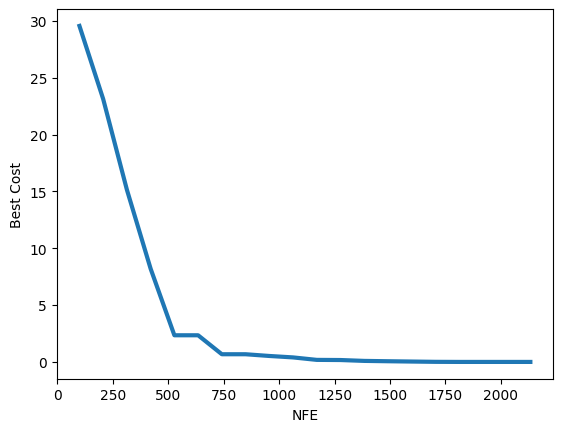

In [11]:
plt.plot(nfe, bestCosts, linewidth = 3)
plt.xlabel('NFE')
plt.ylabel('Best Cost')

### y-axis in logarithm

Text(0, 0.5, 'Best Cost')

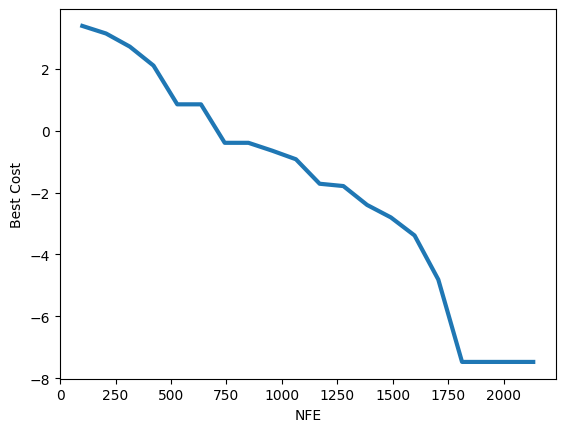

In [12]:
plt.plot(nfe, np.log(bestCosts), linewidth = 3)
plt.xlabel('NFE')
plt.ylabel('Best Cost')